In [13]:
import ROOT
import math
import numpy as np
from funcs import getEtaPhiBins, sumTowers
ROOT.gStyle.SetOptStat(0)

In [58]:
inputFile = 'inputNtuples/ntuple_VBFHToInv_NoPU_WithEnergySplit.root'
isjet = True

In [59]:
fIn = ROOT.TFile.Open(inputFile, "READ")
treeIn = fIn.Get("hgcalTriggerNtuplizer/HGCalTriggerNtuple")

In [60]:
etaBinStep = 0.0870
minBinEta = -35
maxBinEta = 35
minEta = minBinEta * etaBinStep
maxEta = maxBinEta * etaBinStep
nBinsEta = maxBinEta - minBinEta
phiBinStep = 2*math.pi/72
minBinPhi = -36
maxBinPhi = 36
minPhi = minBinPhi * phiBinStep
maxPhi = maxBinPhi * phiBinStep
nBinsPhi = maxBinPhi - minBinPhi
histEM = ROOT.TH2D("histEM","",nBinsEta,minEta,maxEta, nBinsPhi,minPhi,maxPhi)
histHad = ROOT.TH2D("histHad","",nBinsEta,minEta,maxEta, nBinsPhi,minPhi,maxPhi)

In [61]:
treeIn.GetEntry(3)
tower_iPhi = getattr(treeIn,"tower_iPhi")
tower_iEta = getattr(treeIn,"tower_iEta")
tower_etEm = getattr(treeIn,"tower_etEm")
tower_etHad = getattr(treeIn,"tower_etHad")
tower_n = getattr(treeIn,"tower_n")
tower_eta = getattr(treeIn,"tower_eta")
if(isjet):
    jetflag = 'jet'
else:
    jetflag = ''
gen_eta = getattr(treeIn,"gen" + jetflag + "_eta")
gen_phi = getattr(treeIn,"gen" + jetflag + "_phi")
gen_energy = getattr(treeIn,"gen" + jetflag + "_energy")

In [62]:
histEM.Reset()
histHad.Reset()
for towerID in range(tower_n):
    etaPhiBins = getEtaPhiBins(tower_eta[towerID], tower_iEta[towerID], tower_iPhi[towerID])
    histEM.SetBinContent(etaPhiBins[0], etaPhiBins[1], tower_etEm[towerID])
    histHad.SetBinContent(etaPhiBins[0], etaPhiBins[1], tower_etHad[towerID])

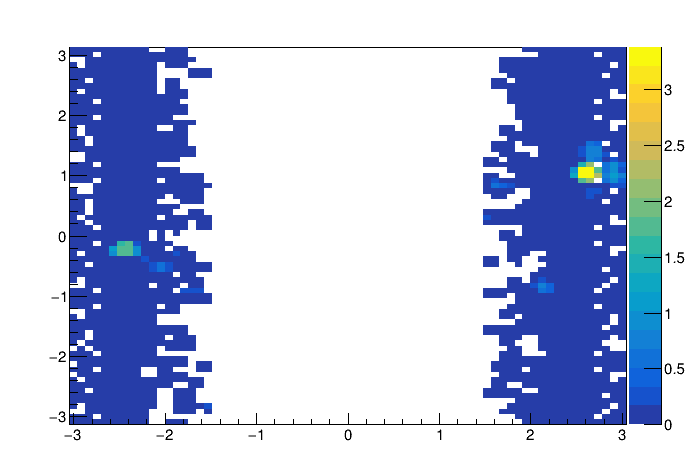

In [63]:
c = ROOT.TCanvas()
histEM.Draw('colz')
c.Draw()

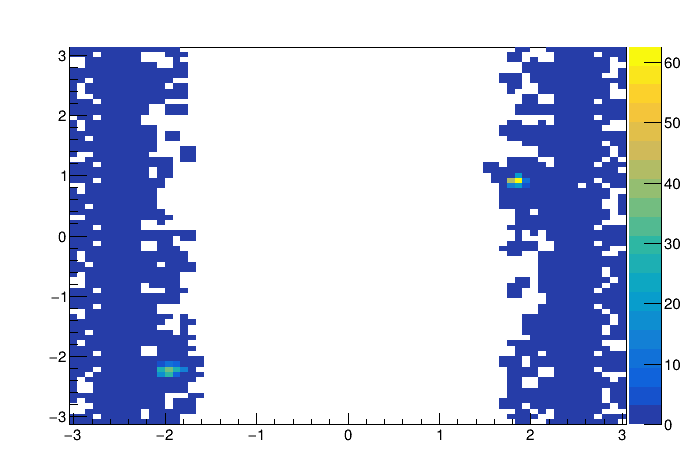

In [19]:
c = ROOT.TCanvas()
histEM.Draw('colz')
c.Draw()